In [104]:
import numpy as np
from scipy import signal
from scipy.signal import butter, lfilter, iirnotch
import matplotlib.pyplot as plt

In [142]:
t = np.linspace(4,4*2000, 2000);
input = [signal.rstrip('\n') for signal in open('DataN.txt')]
data = []
for signal in input:
    data.append(float(signal))

In [105]:
def notch_filter(noisy_signals, sampling_rate, dc_component, quality_factor: int = 30):
    
    b, a = iirnotch(dc_component, quality_factor, sampling_rate)
    noise_free_signals = lfilter(b, a, noisy_signals)
    
    return noise_free_signals

In [111]:
def butter_bandpass_filter(noisy_signals, lowcut, highcut, sampling_rate, order: int = 5):
    nyq = 0.5 * sampling_rate
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    noise_free_signals = lfilter(b, a, noisy_signals)
    return noise_free_signals

In [127]:
def derivatise(signals):
    filterd_signals= np.zeros((len(signals)))
    filterd_signals[0:2] = signals[0:2]

    T = 1/256
    for s in range(2,len(signals)-2):
        op = -float(signals[s-1])
        op -= (2*(float(signals[s-2])))
        op += (2*(float(signals[s+2])))
        op += (float(signals[s+1]))
        op *= (1/(8*T))
        filterd_signals[s] += np.square(op)
    
    return filterd_signals

In [61]:
def smoothen(signals, N):
    smoothed_signals = np.zeros((len(signals)))
    smoothed_signals[0:N] = signals[0:N]
    for s in range(N, len(signals)):
        for n in range(N, -1, -1):
            smoothed_signals[s] += (signals[s-n])
        smoothed_signals[s] *= (1/N)
    return smoothed_signals

In [62]:
def setThreshold(signals, N):
    threshold=0
    start=0
    end=N
    for i in range(0, (len(signals))-1):
        threshold+= max(signals[start:end])
        start+=1
        end+=1
    threshold/= len(signals)
    return threshold

In [139]:
def FindRPeaks(signals, T):
    peaks=[]
   
    for signal in signals:
        if(signal>=T):
            peaks.append(signal)
       
    return peaks

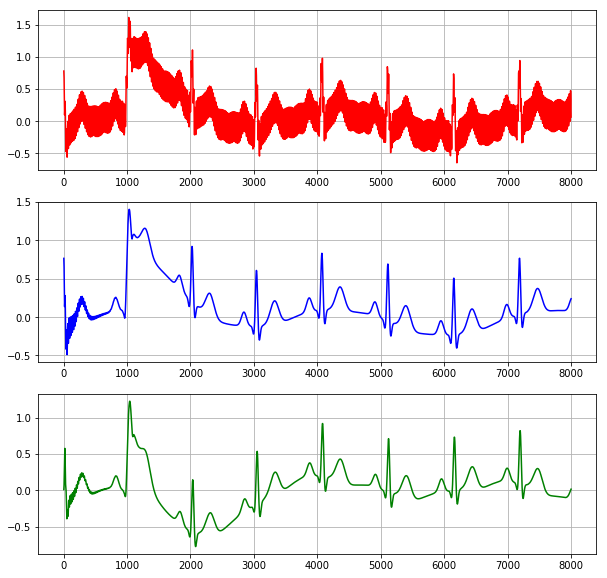

In [144]:
### testing noise filters
dc_component_removed = notch_filter(data[0:2000], 256, 50)
noise_free_signals = butter_bandpass_filter(noise_free, 0.1, 45, 256)
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].plot(t, data[0:2000], color='red')
ax[0].grid()
ax[1].plot(t, dc_component_removed[0:2000], color='blue')
ax[1].grid()
ax[2].plot(t, noise_free_signals[0:2000], color='green')
ax[2].grid()

plt.show()